**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model differnt configurations

0. Model definition - Given by professor

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

1. Using mod_1_hid_lay to build the model with 1 hidden layer

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mod_1_Hid_lay = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

mod_1_Hid_lay.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. Using mod_3_hid_lay to construct the model with 3 hidden layers

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mod_3_Hid_lay = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

mod_3_Hid_lay.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


3. (Question 2) Constructing the model with 32 (mod_32_Hid_Units) fewer hidden units

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mod_32_Hid_Units = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
])

mod_32_Hid_Units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


4. (Question 2) Building the model with higher hidden units 64 (mod_64_Hid_Units).

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mod_64_Hid_Units = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
])

mod_64_Hid_Units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. (Question 3) Building the base model with mse loss function (model_mse_Loss)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

mod_mse_Loss = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

mod_mse_Loss.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

6. (Question 4) Building the model with tanh activation

In [ ]:
mod_tanh_act = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

mod_tanh_act.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

7. (Question 5) Building the model
with regularization (mod_reg)

In [ ]:
from tensorflow.keras import regularizers

mod_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

mod_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. (Question 5) Building the model with dropout (mod_drop)

In [ ]:
mod_drop = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

mod_drop.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_value = x_train[:10000]
x_partial_training = x_train[10000:]
y_value = y_train[:10000]
y_partial_training= y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6165 - loss: 0.6359 - val_accuracy: 0.8472 - val_loss: 0.4720
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8789 - loss: 0.4161 - val_accuracy: 0.8760 - val_loss: 0.3577
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9100 - loss: 0.2953 - val_accuracy: 0.8873 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9324 - loss: 0.2256 - val_accuracy: 0.8855 - val_loss: 0.2915
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9455 - loss: 0.1839 - val_accuracy: 0.8774 - val_loss: 0.3060
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9534 - loss: 0.1596 - val_accuracy: 0.8862 - val_loss: 0.2829
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9607 - loss: 0.1337 - val_accuracy: 0.8862 - val_loss: 0.2896
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9688 - loss: 0.1154 - val_accuracy: 0.8837 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

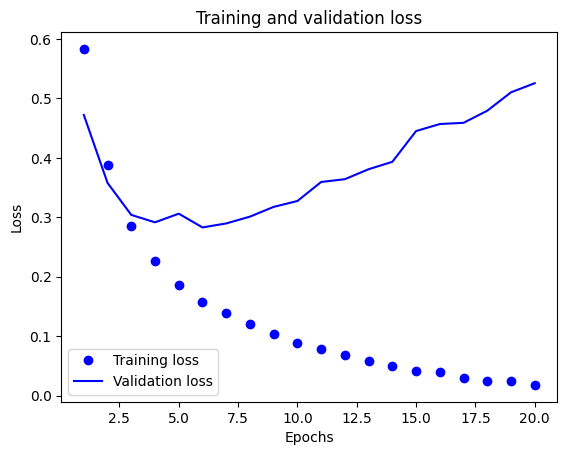

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

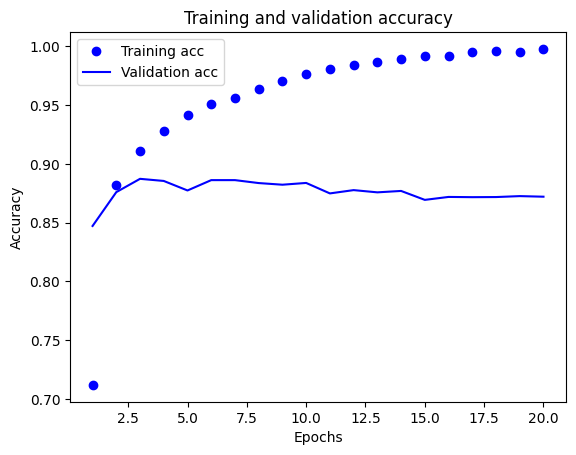

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7251 - loss: 0.5760
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8986 - loss: 0.3063
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9205 - loss: 0.2283
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9358 - loss: 0.1877
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8875 - loss: 0.2815


In [ ]:
results

[0.27969008684158325, 0.8886799812316895]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.22533804],
       [0.9986765 ],
       [0.83394265],
       ...,
       [0.1217445 ],
       [0.07990527],
       [0.6928395 ]], dtype=float32)

### Further experiments

### 1. Model With 1 Hidden Layer

In [ ]:
Model_Hid_lay_1 = mod_1_Hid_lay.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7021 - loss: 0.5978 - val_accuracy: 0.8336 - val_loss: 0.4402
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8844 - loss: 0.3781 - val_accuracy: 0.8720 - val_loss: 0.3546
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9077 - loss: 0.2988 - val_accuracy: 0.8842 - val_loss: 0.3094
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9214 - loss: 0.2471 - val_accuracy: 0.8807 - val_loss: 0.3017
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9335 - loss: 0.2144 - val_accuracy: 0.8883 - val_loss: 0.2823
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9385 - loss: 0.1916 - val_accuracy: 0.8886 - val_loss: 0.2756
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9473 - loss: 0.1722 - val_accuracy: 0.8876 - val_loss: 0.2747
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9543 - loss: 0.1551 - val_accuracy: 0.8852 - v

In [ ]:
Mod_1_Hid_Lay_dict = Model_Hid_lay_1.history
Mod_1_Hid_Lay_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

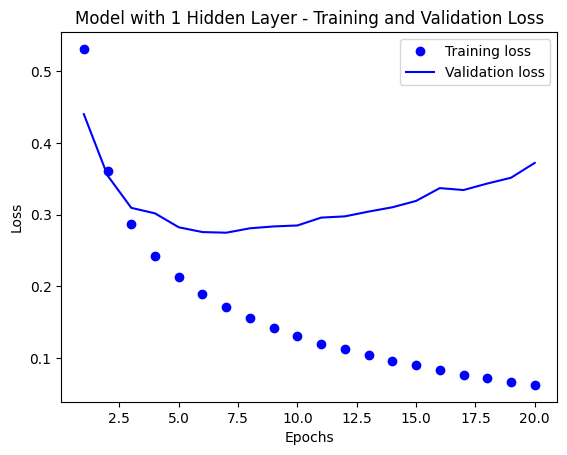

In [ ]:
import matplotlib.pyplot as plt
Mod_1_Hid_Lay_dict = Model_Hid_lay_1.history
loss_values_1 = Mod_1_Hid_Lay_dict["loss"]  # Training loss values
val_loss_values_1 = Mod_1_Hid_Lay_dict["val_loss"]  # Validation loss values

epochs = range(1, len(loss_values_1) + 1)

# Plot the loss values
plt.plot(epochs, loss_values_1, "bo", label="Training loss")  # Training loss with blue dots
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")  # Validation loss with blue line
plt.title("Model with 1 Hidden Layer - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Plotting Accuracy

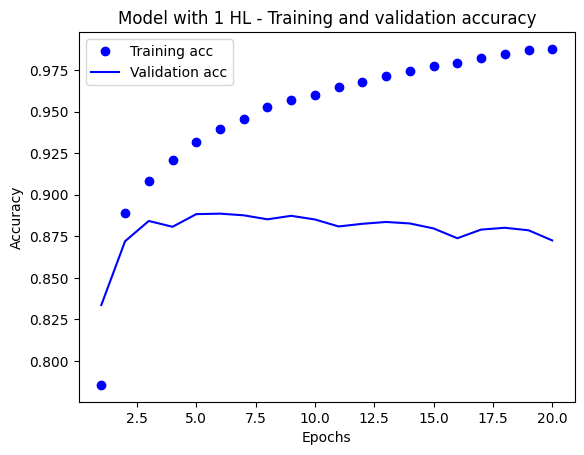

In [ ]:
plt.clf()
acc_1 = Mod_1_Hid_Lay_dict["accuracy"]
val_acc_1 = Mod_1_Hid_Lay_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Retraining

In [ ]:
mod_1_Hid_lay = keras.Sequential([
    layers.Dense(16, activation="relu"),  # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])

mod_1_Hid_lay.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Train the model
mod_1_Hid_lay.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model
model_1_HL_results = mod_1_Hid_lay.evaluate(x_test, y_test)  # Consistent naming


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7437 - loss: 0.5428
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9013 - loss: 0.3057
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9189 - loss: 0.2424
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9290 - loss: 0.2106
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8878 - loss: 0.2792


In [ ]:
model_1_HL_results


[0.2788563370704651, 0.8888000249862671]

Using Trained data to predict

In [ ]:
mod_1_Hid_lay.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.25001892],
       [0.99904597],
       [0.79243404],
       ...,
       [0.1136964 ],
       [0.08588086],
       [0.52381235]], dtype=float32)

###2. Model With 3 Hidden Layer

In [ ]:
Model_3_Hid_Lay = mod_3_Hid_lay.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6835 - loss: 0.6268 - val_accuracy: 0.8609 - val_loss: 0.4128
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8867 - loss: 0.3545 - val_accuracy: 0.8796 - val_loss: 0.3134
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9189 - loss: 0.2416 - val_accuracy: 0.8831 - val_loss: 0.2904
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9406 - loss: 0.1859 - val_accuracy: 0.8851 - val_loss: 0.2844
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9506 - loss: 0.1522 - val_accuracy: 0.8846 - val_loss: 0.2918
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9578 - loss: 0.1260 - val_accuracy: 0.8815 - val_loss: 0.3029
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9679 - loss: 0.1059 - val_accuracy: 0.8827 - val_loss: 0.3142
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9758 - loss: 0.0877 - val_accuracy: 0.8788 - v

In [ ]:
Model_3_Hid_Lay_dict = Model_3_Hid_Lay.history
Model_3_Hid_Lay_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

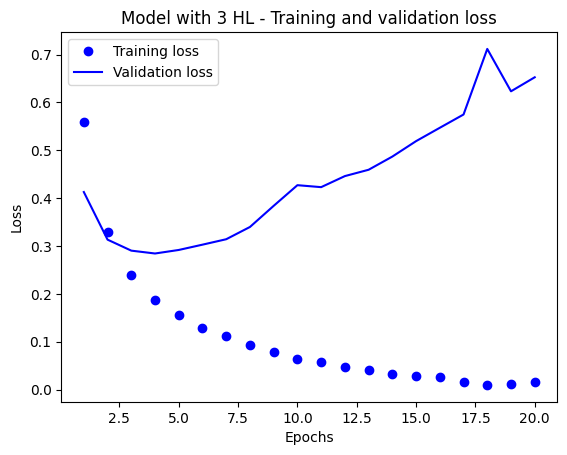

In [ ]:
import matplotlib.pyplot as plt
Model_3_Hid_Lay_dict = Model_3_Hid_Lay.history
loss_values_3 = Model_3_Hid_Lay_dict["loss"]
val_loss_values_3 = Model_3_Hid_Lay_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

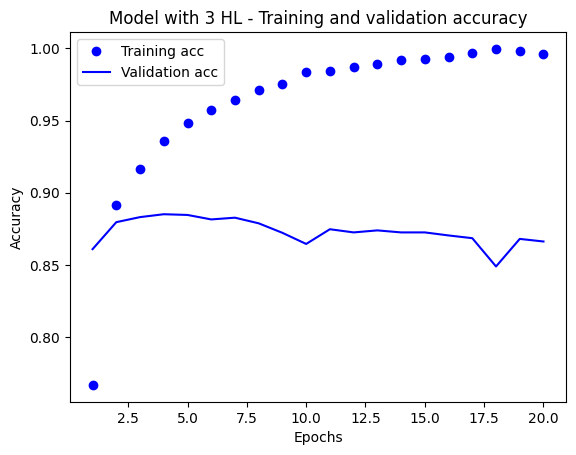

In [ ]:
plt.clf()
acc_3 = Model_3_Hid_Lay_dict["accuracy"]
val_acc_3 = Model_3_Hid_Lay_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_3_Hid_lay = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
mod_3_Hid_lay.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_3_Hid_lay.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hid_Lay_Results = mod_3_Hid_lay.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7082 - loss: 0.5782
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9026 - loss: 0.2826
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9279 - loss: 0.2051
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9381 - loss: 0.1784
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9507 - loss: 0.1455
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9535 - loss: 0.1331
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8767 - loss: 0.3321


In [ ]:
Model_3_Hid_Lay_Results

[0.32868069410324097, 0.878279983997345]

Using Trained data to predict

In [ ]:
mod_3_Hid_lay.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.09076964],
       [0.9999962 ],
       [0.7804627 ],
       ...,
       [0.11356951],
       [0.05732127],
       [0.83980644]], dtype=float32)

### 3. Model With 32 Hidden Units

In [ ]:
Mod_32_Hid_Units = mod_32_Hid_Units.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6780 - loss: 0.5987 - val_accuracy: 0.8511 - val_loss: 0.3967
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8887 - loss: 0.3225 - val_accuracy: 0.8843 - val_loss: 0.3036
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9228 - loss: 0.2327 - val_accuracy: 0.8708 - val_loss: 0.3187
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9371 - loss: 0.1834 - val_accuracy: 0.8792 - val_loss: 0.3080
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9438 - loss: 0.1596 - val_accuracy: 0.8866 - val_loss: 0.2818
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9579 - loss: 0.1282 - val_accuracy: 0.8854 - val_loss: 0.2956
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9685 - loss: 0.1029 - val_accuracy: 0.8863 - val_loss: 0.3111
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9695 - loss: 0.0937 - val_accuracy: 0.8521 - v

In [ ]:
Mod_32_Hid_Units_dict = Mod_32_Hid_Units.history
Mod_32_Hid_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

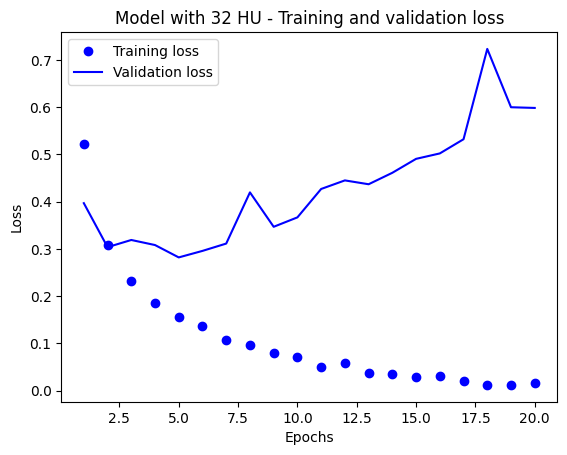

In [ ]:
import matplotlib.pyplot as plt
Mod_32_Hid_Units_dict = Mod_32_Hid_Units.history
loss_values_32 = Mod_32_Hid_Units_dict["loss"]
val_loss_values_32 = Mod_32_Hid_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

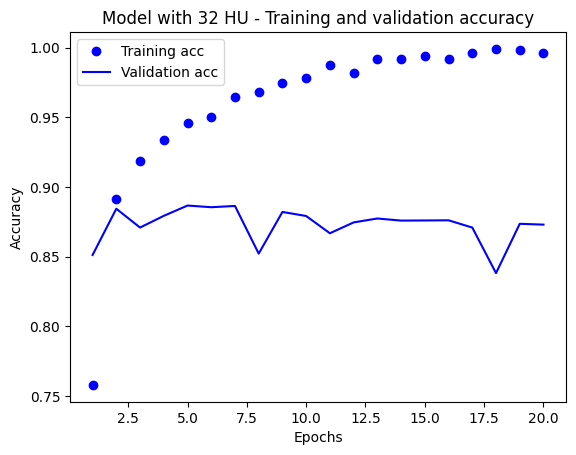

In [ ]:
plt.clf()
acc_32 = Mod_32_Hid_Units_dict["accuracy"]
val_acc_32 = Mod_32_Hid_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_32_Hid_Units = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
mod_32_Hid_Units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_32_Hid_Units.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Mod_32_Hid_Units_Results = mod_32_Hid_Units.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7185 - loss: 0.5531
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8998 - loss: 0.2802
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9192 - loss: 0.2126
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3745


In [ ]:
Mod_32_Hid_Units_Results

[0.3668949604034424, 0.8514000177383423]

Using Trained data to predict

In [ ]:
mod_32_Hid_Units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.37810856],
       [0.9986513 ],
       [0.98814434],
       ...,
       [0.20187196],
       [0.14320774],
       [0.702107  ]], dtype=float32)

### 4. Model With 64 Hidden Units

In [ ]:
Mod_64_Hid_Units = mod_64_Hid_Units.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6715 - loss: 0.5998 - val_accuracy: 0.8275 - val_loss: 0.4020
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8714 - loss: 0.3294 - val_accuracy: 0.8023 - val_loss: 0.4564
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9061 - loss: 0.2487 - val_accuracy: 0.8892 - val_loss: 0.2738
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9321 - loss: 0.1883 - val_accuracy: 0.8845 - val_loss: 0.2867
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9505 - loss: 0.1472 - val_accuracy: 0.8864 - val_loss: 0.2869
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9501 - loss: 0.1432 - val_accuracy: 0.8736 - val_loss: 0.3284
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9697 - loss: 0.0942 - val_accuracy: 0.8827 - val_loss: 0.3169
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9773 - loss: 0.0802 - val_accuracy: 0.8816 - v

In [ ]:
Mod_64_Hid_Units_dict = Mod_64_Hid_Units.history
Mod_64_Hid_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

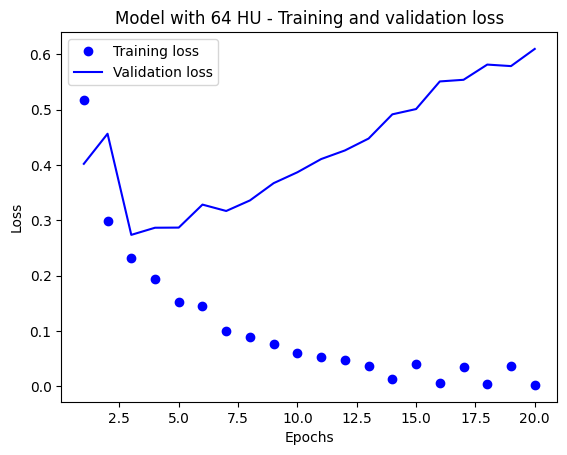

In [ ]:
import matplotlib.pyplot as plt
Mod_64_Hid_Units_dict = Mod_64_Hid_Units.history
loss_values_64 = Mod_64_Hid_Units_dict["loss"]
val_loss_values_64 = Mod_64_Hid_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

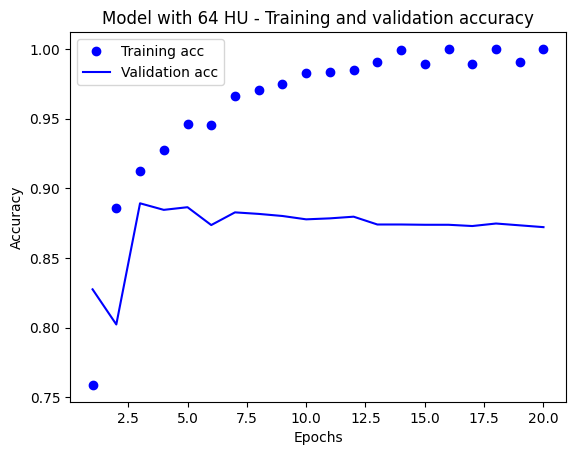

In [ ]:
plt.clf()
acc_64 = Mod_64_Hid_Units_dict["accuracy"]
val_acc_64 = Mod_64_Hid_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_64_Hid_Units = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
mod_64_Hid_Units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_64_Hid_Units.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Mod_64_Hid_Units_Results = mod_64_Hid_Units.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7270 - loss: 0.5453
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8915 - loss: 0.2752
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8843 - loss: 0.2868


In [ ]:
Mod_64_Hid_Units_Results

[0.28887975215911865, 0.8835600018501282]

In [ ]:
mod_64_Hid_Units.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19753587],
       [0.99911904],
       [0.84019506],
       ...,
       [0.10556081],
       [0.08894978],
       [0.27798998]], dtype=float32)

### 5. Model With MSE Loss

In [ ]:
Mod_MSE_LOSS = mod_mse_Loss.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6725 - loss: 0.2132 - val_accuracy: 0.8472 - val_loss: 0.1391
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8820 - loss: 0.1195 - val_accuracy: 0.8782 - val_loss: 0.1042
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9146 - loss: 0.0832 - val_accuracy: 0.8770 - val_loss: 0.0964
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9263 - loss: 0.0688 - val_accuracy: 0.8876 - val_loss: 0.0867
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9406 - loss: 0.0560 - val_accuracy: 0.8809 - val_loss: 0.0895
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9458 - loss: 0.0511 - val_accuracy: 0.8830 - val_loss: 0.0849
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9547 - loss: 0.0434 - val_accuracy: 0.8865 - val_loss: 0.0840
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9618 - loss: 0.0380 - val_accuracy: 0.8848 - v

In [ ]:
Mod_MSE_LOSS_dict = Mod_MSE_LOSS.history
Mod_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

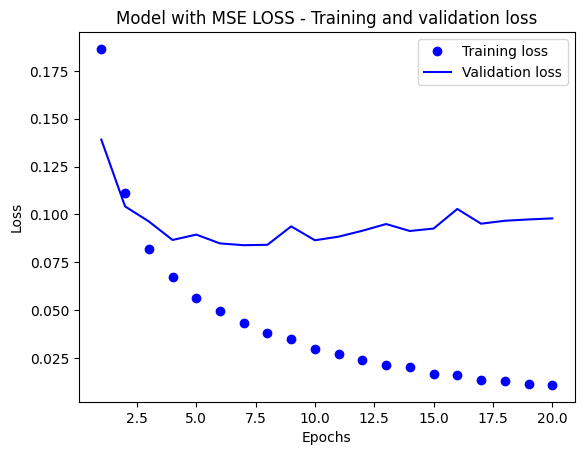

In [ ]:
import matplotlib.pyplot as plt
Mod_MSE_LOSS_dict = Mod_MSE_LOSS.history
loss_values_MSE = Mod_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Mod_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("Model with MSE LOSS - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

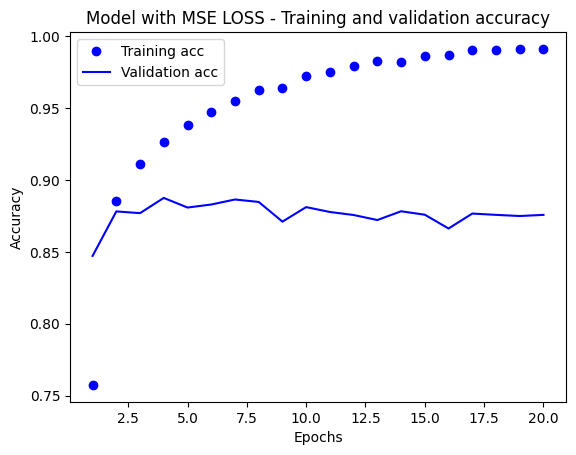

In [ ]:
plt.clf()
acc_MSE = Mod_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Mod_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("Model with MSE LOSS - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_mse_Loss = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
mod_mse_Loss.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
mod_mse_Loss.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Mod_MSE_LOSS_Results = mod_mse_Loss.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7263 - loss: 0.1988
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8889 - loss: 0.0972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9158 - loss: 0.0725
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9310 - loss: 0.0599
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8861 - loss: 0.0861


In [ ]:
Mod_MSE_LOSS_Results

[0.08477701991796494, 0.887719988822937]

In [ ]:
mod_mse_Loss.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.25730374],
       [0.9984819 ],
       [0.9215844 ],
       ...,
       [0.17270125],
       [0.14617556],
       [0.5638504 ]], dtype=float32)

### 6. Model With tanh activation

In [ ]:
Model_TANH_ACT = mod_tanh_act.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7004 - loss: 0.5929 - val_accuracy: 0.8750 - val_loss: 0.3694
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9012 - loss: 0.3100 - val_accuracy: 0.8899 - val_loss: 0.2902
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9262 - loss: 0.2180 - val_accuracy: 0.8906 - val_loss: 0.2697
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9465 - loss: 0.1626 - val_accuracy: 0.8718 - val_loss: 0.3132
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9568 - loss: 0.1327 - val_accuracy: 0.8872 - val_loss: 0.2933
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9707 - loss: 0.0970 - val_accuracy: 0.8802 - val_loss: 0.3191
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9768 - loss: 0.0791 - val_accuracy: 0.8597 - val_loss: 0.4123
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9747 - loss: 0.0789 - val_accuracy: 0.8776 - v

In [ ]:
Mod_TANH_ACT_dict = Model_TANH_ACT.history
Mod_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

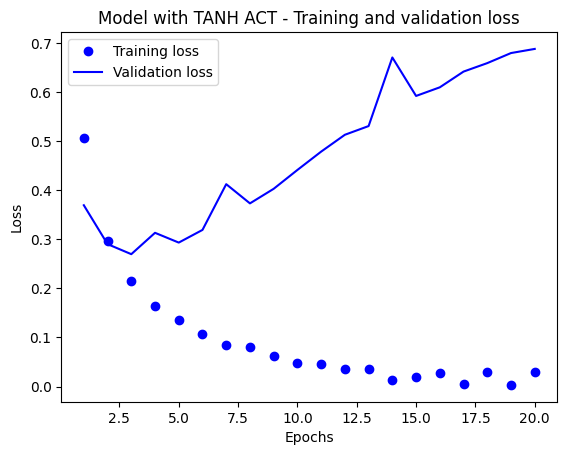

In [ ]:
import matplotlib.pyplot as plt
Mod_TANH_ACT_dict = Model_TANH_ACT.history
loss_values_TANH = Mod_TANH_ACT_dict["loss"]
val_loss_values_TANH = Mod_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("Model with TANH ACT - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

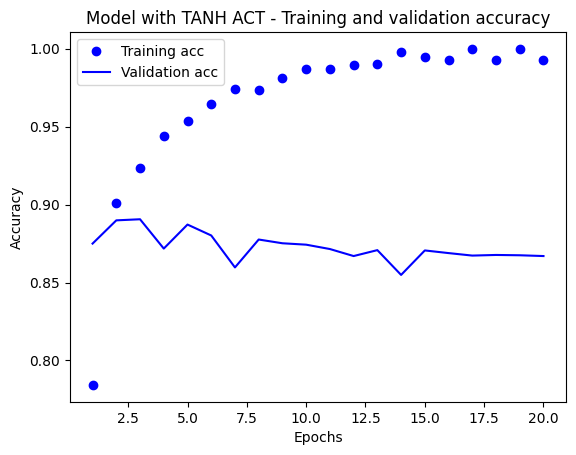

In [ ]:
plt.clf()
acc_TANH = Mod_TANH_ACT_dict["accuracy"]
val_acc_TANH = Mod_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("Model with TANH ACT - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
model_tanh_act = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
mod_tanh_act.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_tanh_act.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = mod_tanh_act.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9385 - loss: 0.2884
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9606 - loss: 0.1423
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9653 - loss: 0.1144
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8595 - loss: 0.4455


In [ ]:
Model_TANH_ACT_Results

[0.44295835494995117, 0.8612800240516663]

In [ ]:
model_tanh_act.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


array([[0.5184573 ],
       [0.49729413],
       [0.5320363 ],
       ...,
       [0.5379334 ],
       [0.46330127],
       [0.47039807]], dtype=float32)

### 7. Model With L2 Regularization

In [ ]:
Mod_Reg_Tech = mod_reg.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6713 - loss: 0.6931 - val_accuracy: 0.8382 - val_loss: 0.5362
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8724 - loss: 0.4853 - val_accuracy: 0.8673 - val_loss: 0.4229
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9035 - loss: 0.3681 - val_accuracy: 0.8805 - val_loss: 0.3699
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9201 - loss: 0.3063 - val_accuracy: 0.8854 - val_loss: 0.3445
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9319 - loss: 0.2595 - val_accuracy: 0.8874 - val_loss: 0.3347
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9372 - loss: 0.2492 - val_accuracy: 0.8839 - val_loss: 0.3441
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9465 - loss: 0.2267 - val_accuracy: 0.8862 - val_loss: 0.3370
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9538 - loss: 0.2111 - val_accuracy: 0.8828 - v

In [ ]:
Mod_Reg_Tech_dict = Mod_Reg_Tech.history
Mod_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

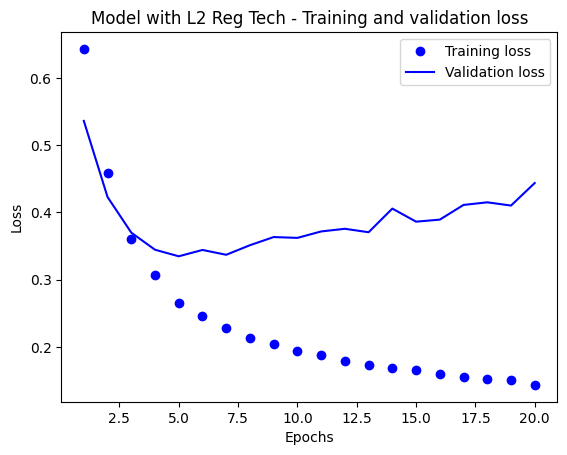

In [ ]:
import matplotlib.pyplot as plt
Mod_Reg_Tech_dict = Mod_Reg_Tech.history
loss_values_Reg = Mod_Reg_Tech_dict["loss"]
val_loss_values_Reg = Mod_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("Model with L2 Reg Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

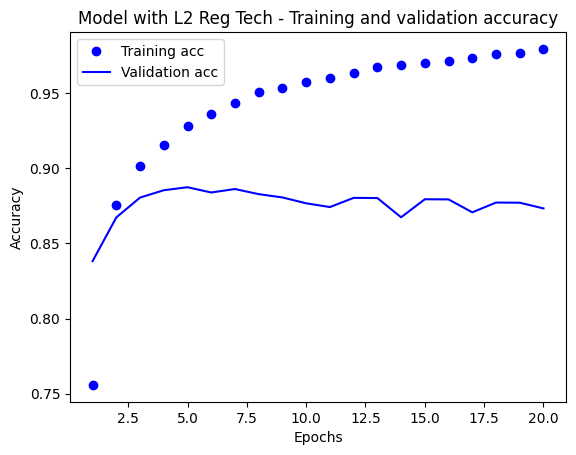

In [ ]:
plt.clf()
acc_Reg = Mod_Reg_Tech_dict["accuracy"]
val_acc_Reg = Mod_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("Model with L2 Reg Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
mod_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_reg.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Mod_Reg_Tech_Results = mod_reg.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7093 - loss: 0.6544
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8926 - loss: 0.3779
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8838 - loss: 0.3507


In [ ]:
Mod_Reg_Tech_Results

[0.34889715909957886, 0.8835999965667725]

In [ ]:
mod_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.38586932],
       [0.9966865 ],
       [0.8970009 ],
       ...,
       [0.21163133],
       [0.27461314],
       [0.5578468 ]], dtype=float32)

###8. Model With Dropout Technique`

In [ ]:
Mod_Drp_Tech = mod_drop.fit(x_partial_training,
                    y_partial_training,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5760 - loss: 0.6636 - val_accuracy: 0.8467 - val_loss: 0.4976
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7428 - loss: 0.5338 - val_accuracy: 0.8475 - val_loss: 0.4279
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8071 - loss: 0.4499 - val_accuracy: 0.8734 - val_loss: 0.3519
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8503 - loss: 0.3762 - val_accuracy: 0.8759 - val_loss: 0.3202
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8737 - loss: 0.3325 - val_accuracy: 0.8882 - val_loss: 0.2844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8980 - loss: 0.2862 - val_accuracy: 0.8889 - val_loss: 0.2754
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9147 - loss: 0.2524 - val_accuracy: 0.8876 - val_loss: 0.2739
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9262 - loss: 0.2256 - val_accuracy: 0.8881 - v

In [ ]:
Mod_Drp_Tech_dict = Mod_Drp_Tech.history
Mod_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting the graphshowing training and validation loss

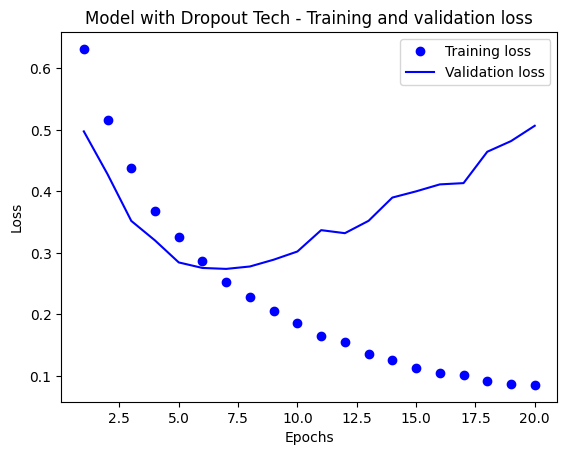

In [ ]:
import matplotlib.pyplot as plt
Mod_Drp_Tech_dict = Mod_Drp_Tech.history
loss_values_Drp = Mod_Drp_Tech_dict["loss"]
val_loss_values_Drp = Mod_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Model with Dropout Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

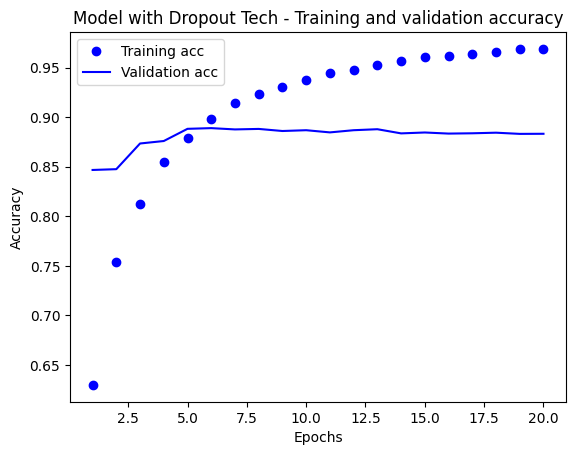

In [ ]:
plt.clf()
acc_Drp = Mod_Drp_Tech_dict["accuracy"]
val_acc_Drp = Mod_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Model with Dropout Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [ ]:
mod_drop = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
mod_drop.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
mod_drop.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Mod_Drp_Tech_Results = mod_drop.evaluate(x_test, y_test)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6141 - loss: 0.6422
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7918 - loss: 0.4725
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8509 - loss: 0.3757
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8786 - loss: 0.3242
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9009 - loss: 0.2742
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9166 - loss: 0.2421
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9239 - loss: 0.2227
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9282 - loss: 0.1991
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9378 - loss: 0.1795
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.3354


In [ ]:
Mod_Drp_Tech_Results

[0.33013734221458435, 0.8845999836921692]

In [ ]:
mod_drop.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.06496964],
       [0.99999976],
       [0.9980126 ],
       ...,
       [0.1093513 ],
       [0.02364079],
       [0.787282  ]], dtype=float32)

### Comparison of the Models

In [ ]:
history_dict = history.history
history_dict.keys()

Mod_1_Hid_Lay_dict = Model_Hid_lay_1.history
Mod_1_Hid_Lay_dict.keys()

Model_3_Hid_Lay_dict = Model_3_Hid_Lay.history
Model_3_Hid_Lay_dict.keys()

Mod_32_Hid_Units_dict = Mod_32_Hid_Units.history
Mod_32_Hid_Units_dict.keys()

Mod_64_Hid_Units_dict = Mod_64_Hid_Units.history
Mod_64_Hid_Units_dict.keys()

Mod_MSE_LOSS_dict = Mod_MSE_LOSS.history
Mod_MSE_LOSS_dict.keys()

Mod_TANH_ACT_dict = Model_TANH_ACT.history
Mod_TANH_ACT_dict.keys()

Mod_Reg_Tech_dict = Mod_Reg_Tech.history
Mod_Reg_Tech_dict.keys()

Mod_Drp_Tech_dict = Mod_Drp_Tech.history
Mod_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Question 1 - Comparing Hidden layers with Base Model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


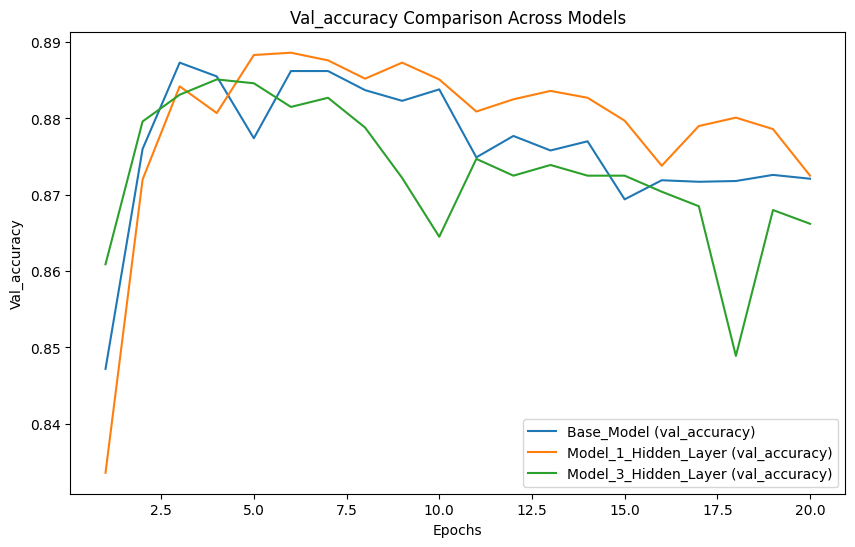

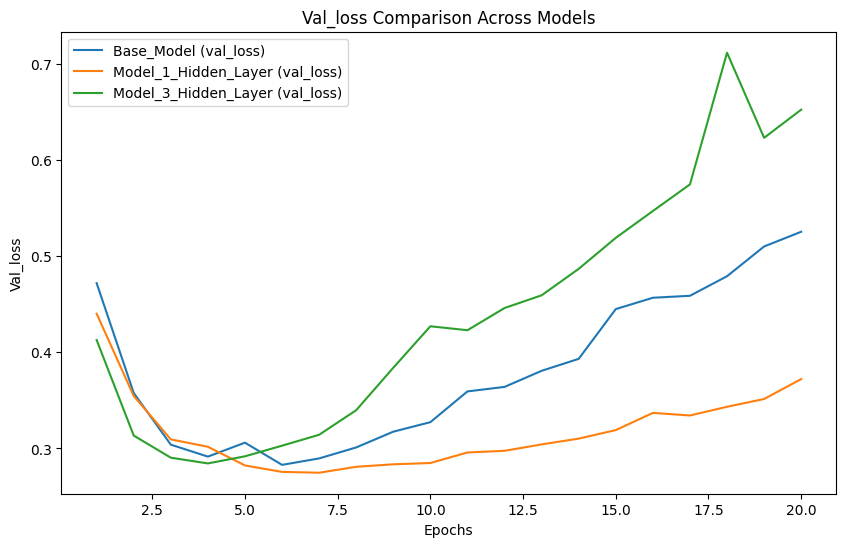

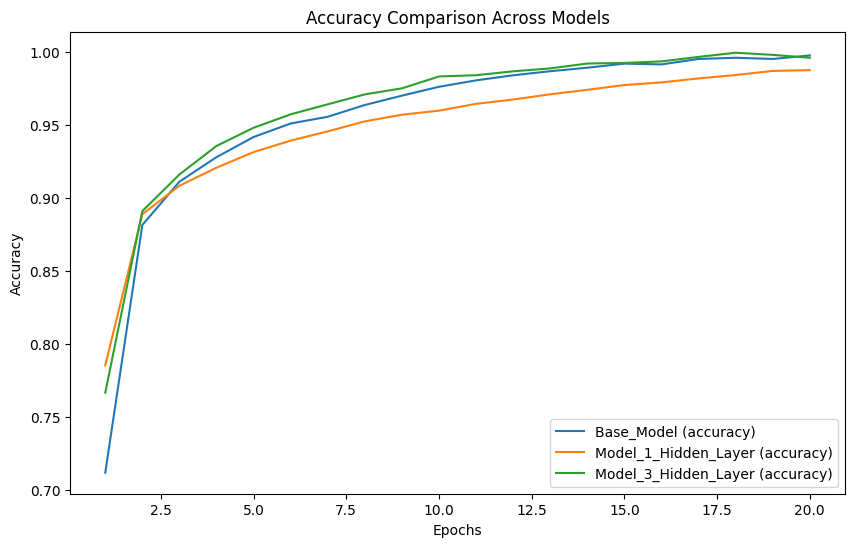

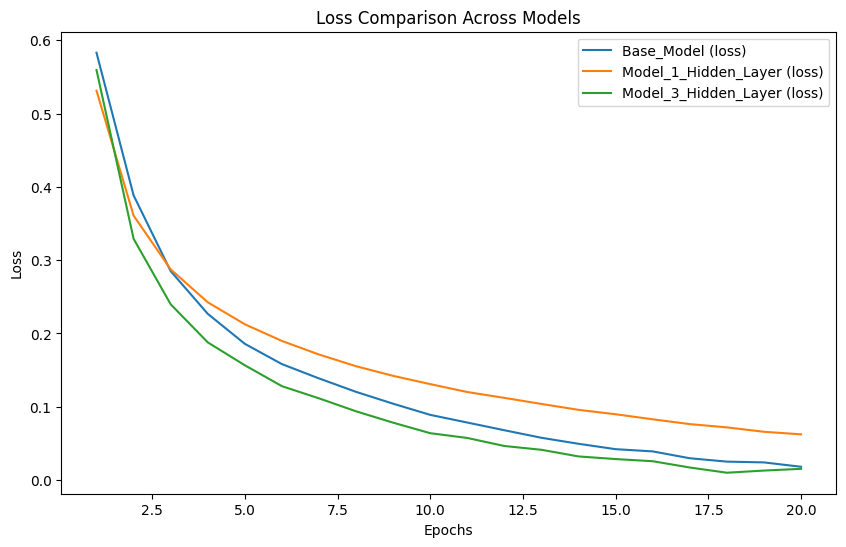

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": history,
    "Model_1_Hidden_Layer": Model_Hid_lay_1,
    "Model_3_Hidden_Layer": Model_3_Hid_Lay,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 2 - Comparing Base model with Hidden Units value of 16, 32 and 64

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


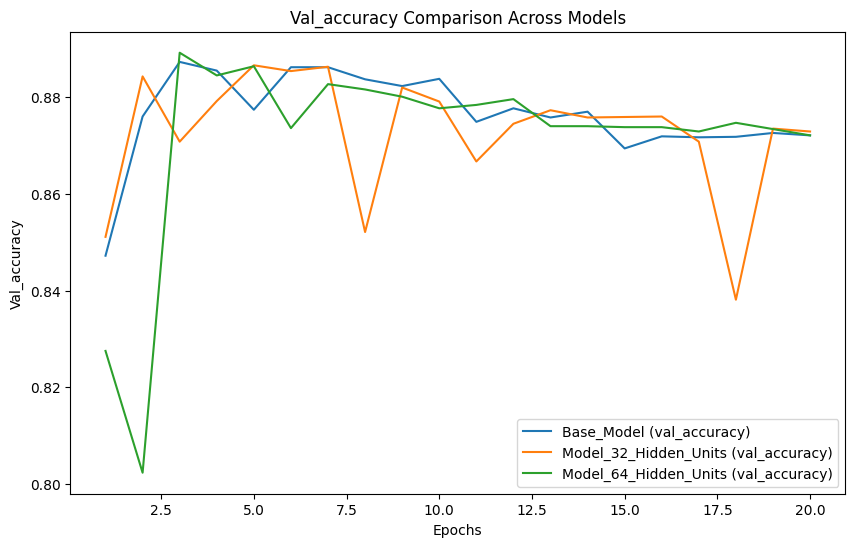

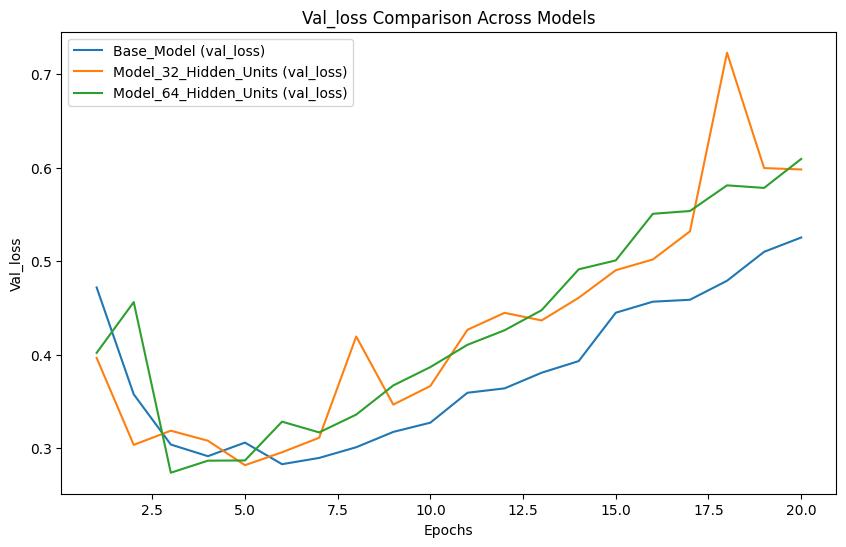

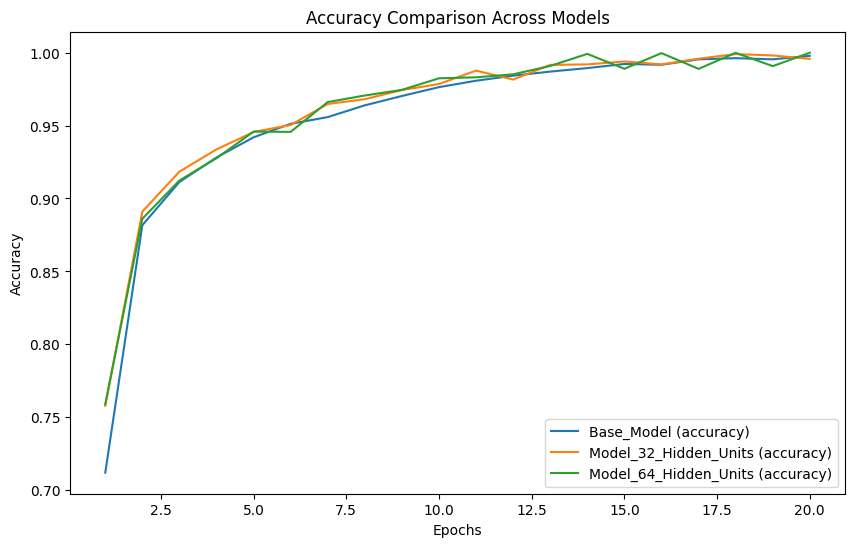

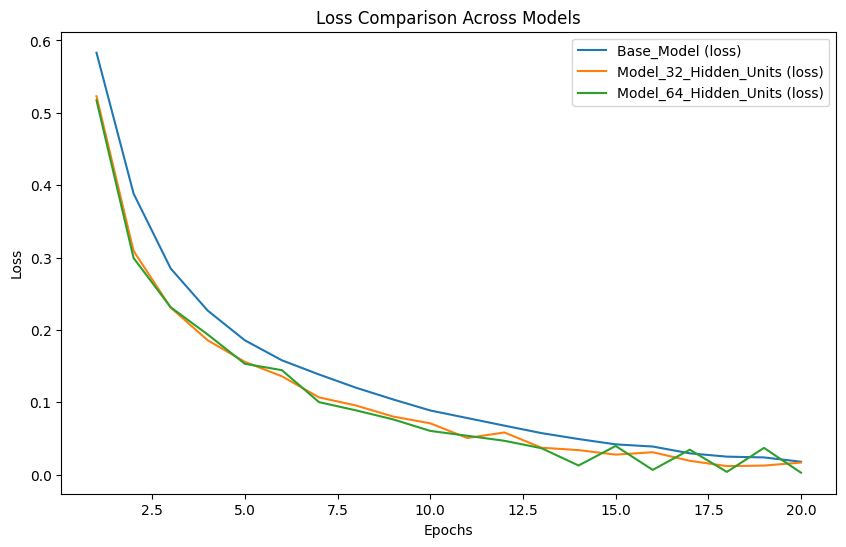

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": history,
    "Model_32_Hidden_Units": Mod_32_Hid_Units,
    "Model_64_Hidden_Units": Mod_64_Hid_Units,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 3 - Comparing of MSE loss function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


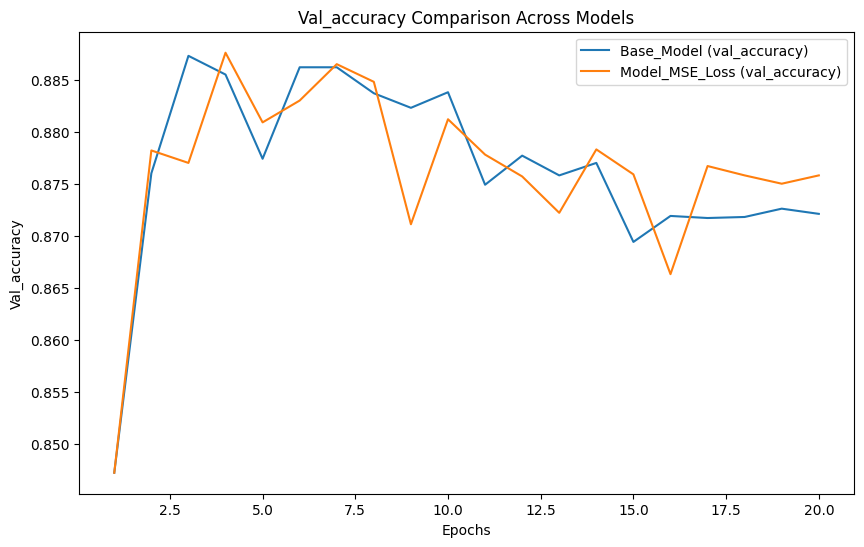

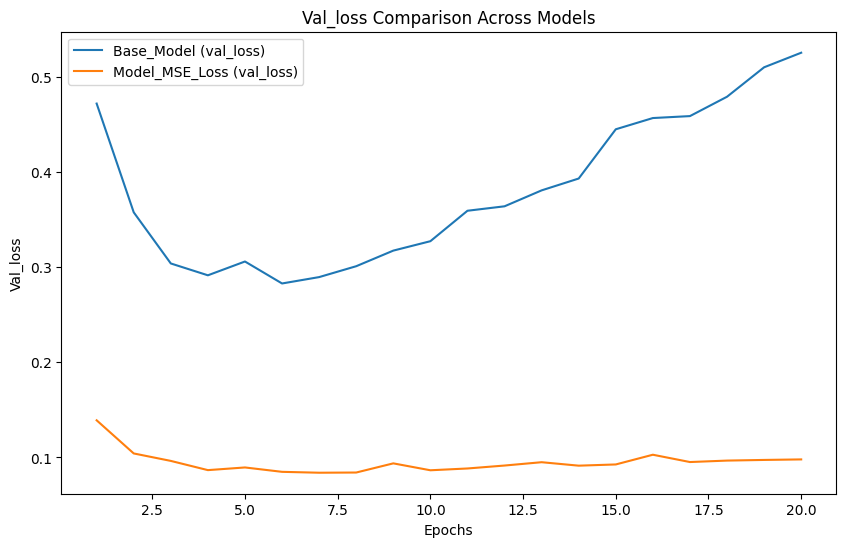

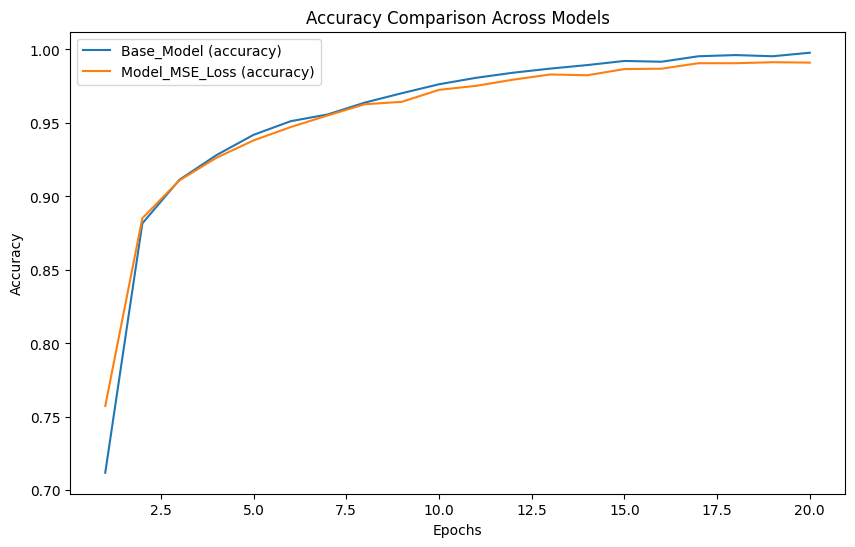

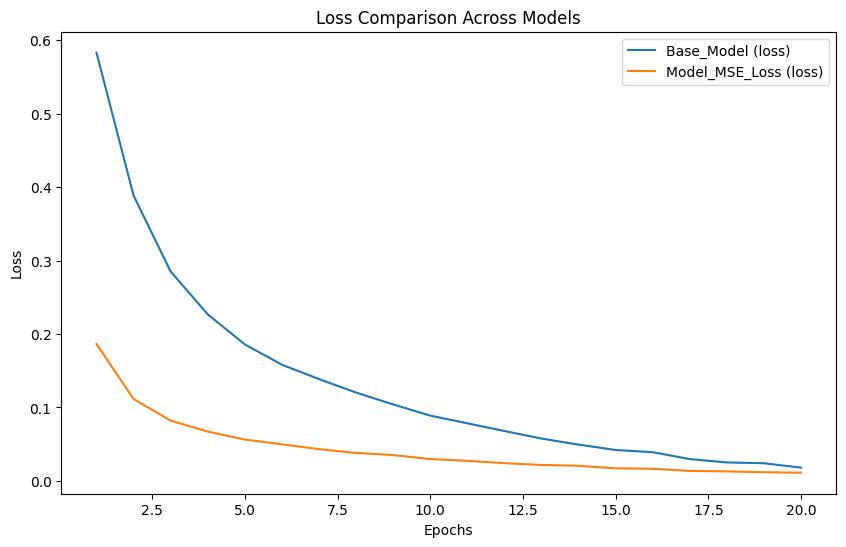

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": history,
    "Model_MSE_Loss": Mod_MSE_LOSS,
 }

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 4 - Comparing of Tanh activation with base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


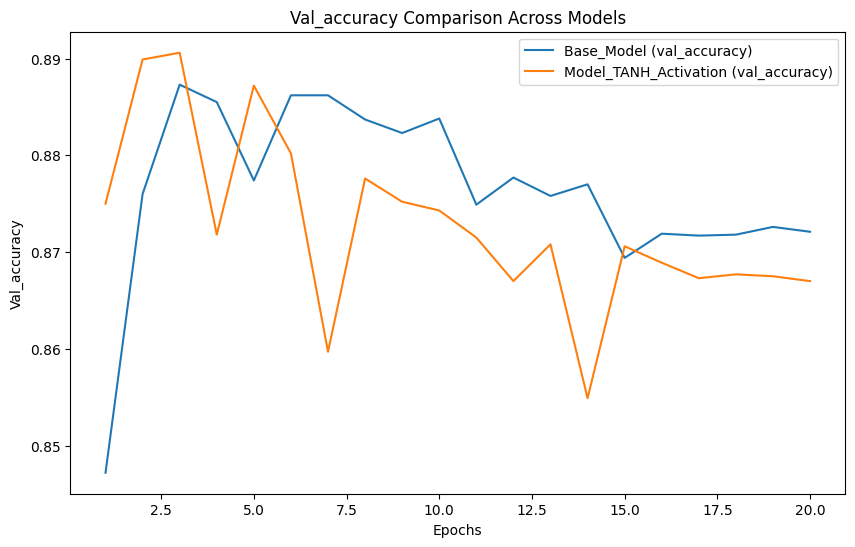

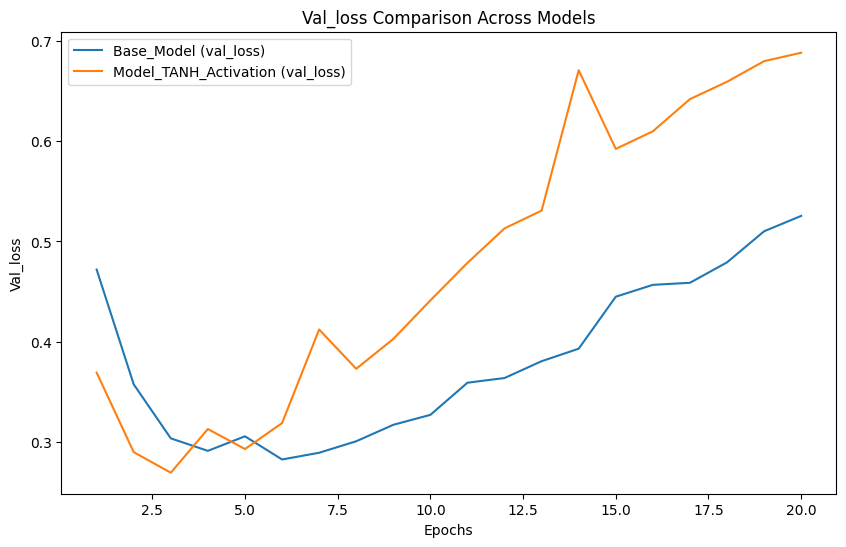

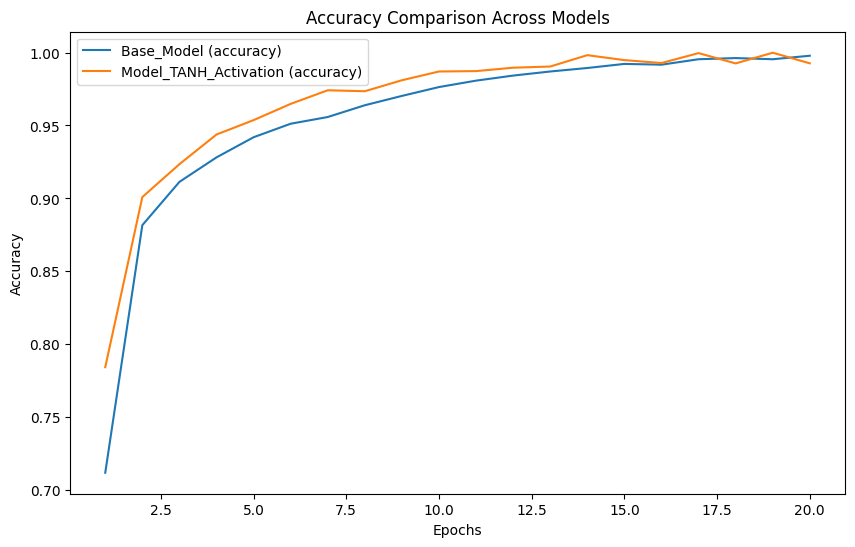

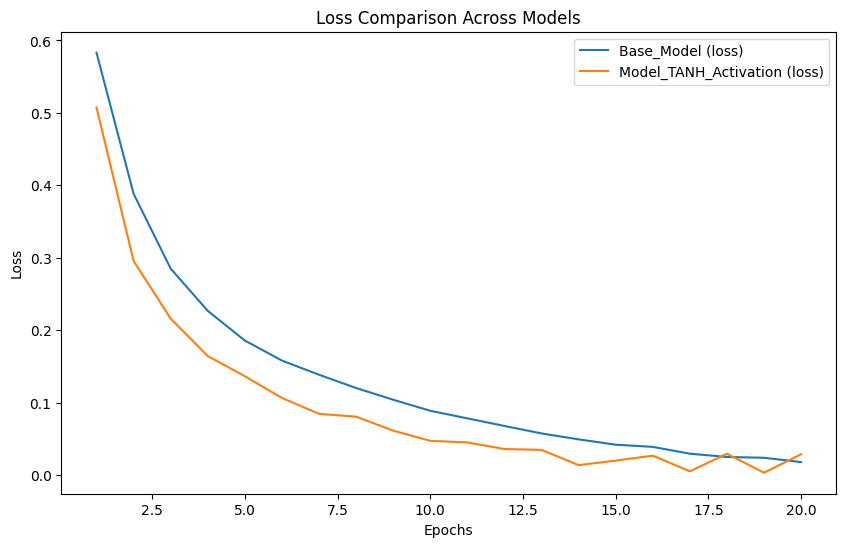

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": history,
    "Model_TANH_Activation": Model_TANH_ACT,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 5 - Comparison of L2 regularization, Dropout and Base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


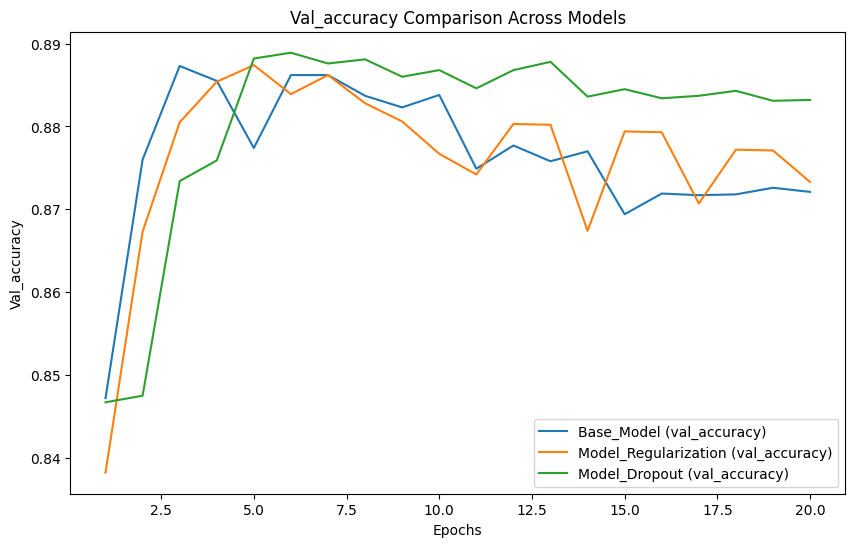

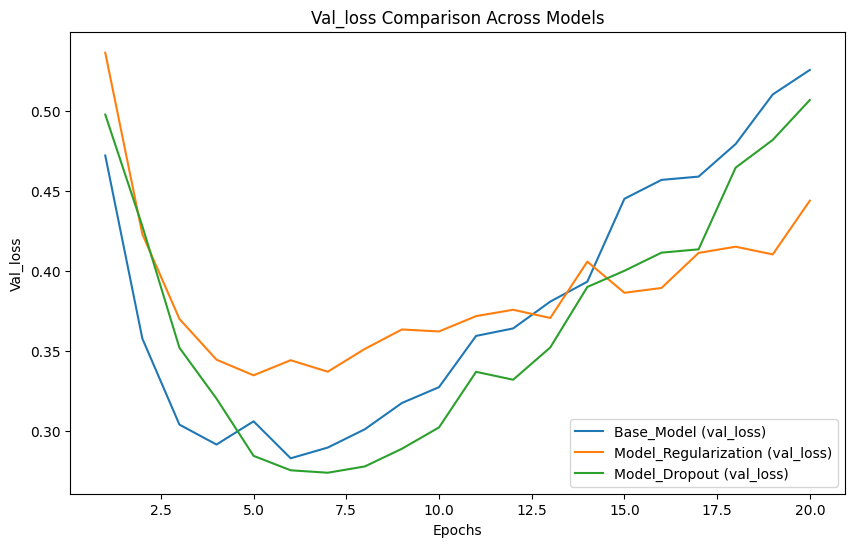

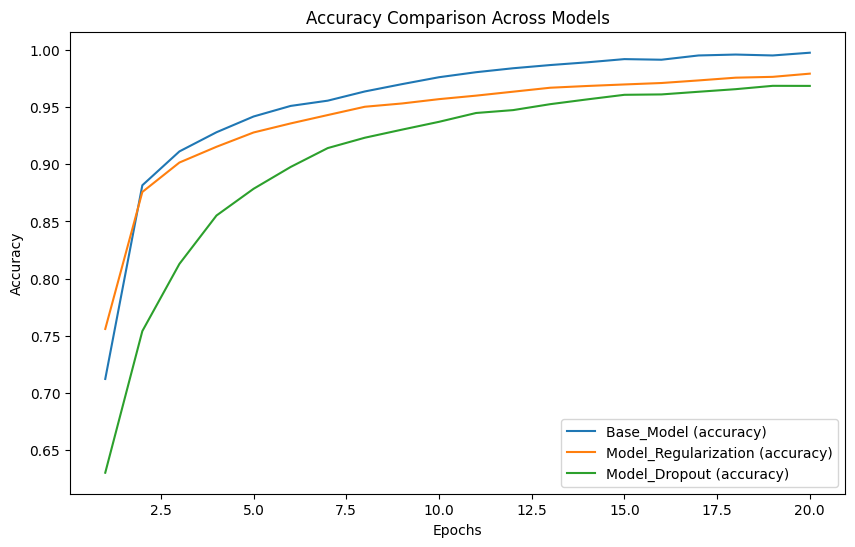

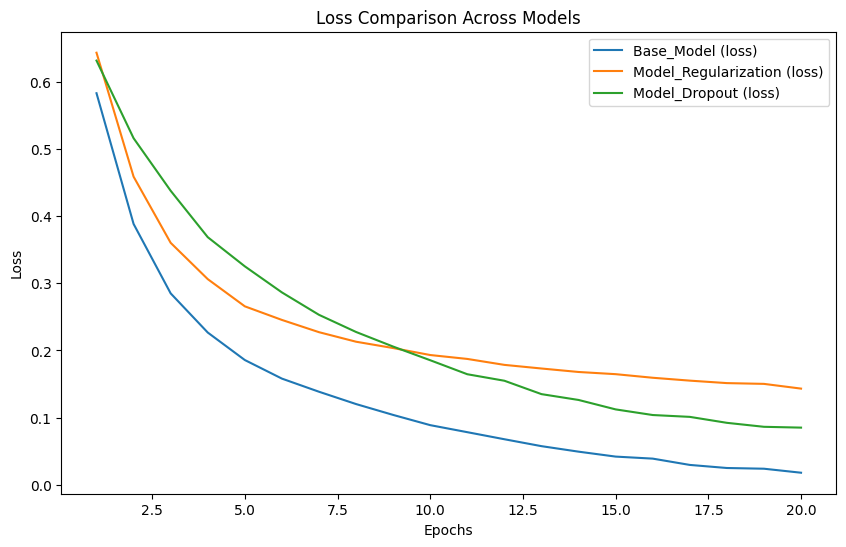

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": history,
    "Model_Regularization": Mod_Reg_Tech,
    "Model_Dropout": Mod_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing all the models

History history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


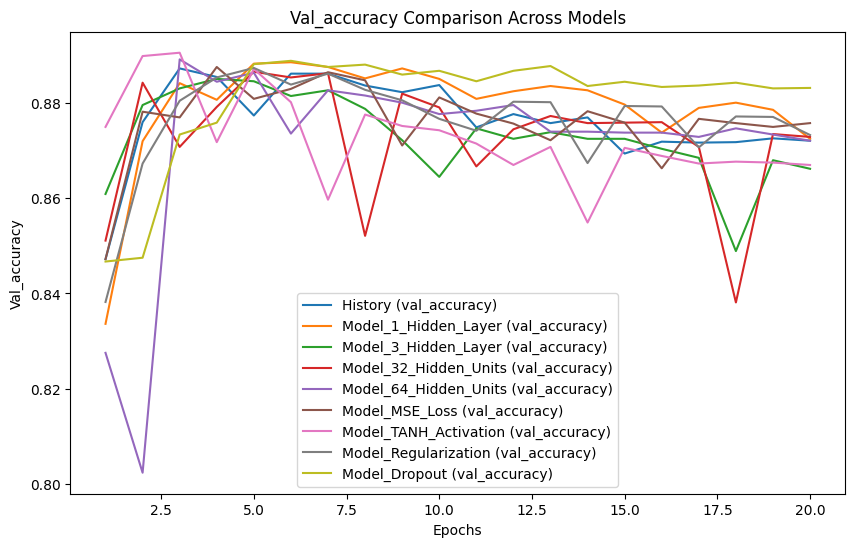

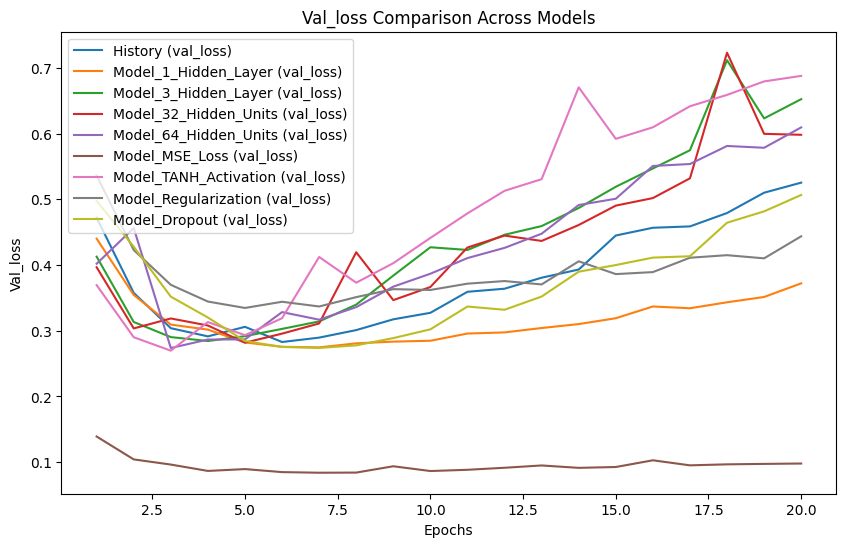

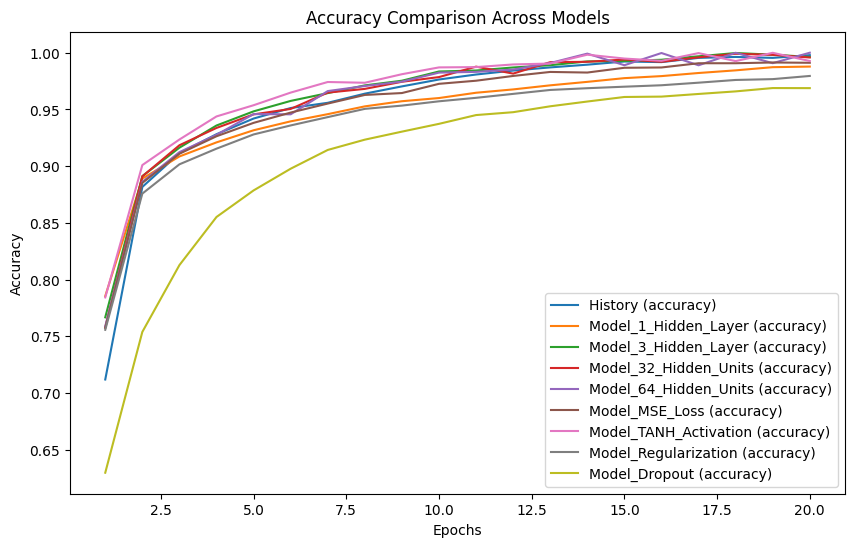

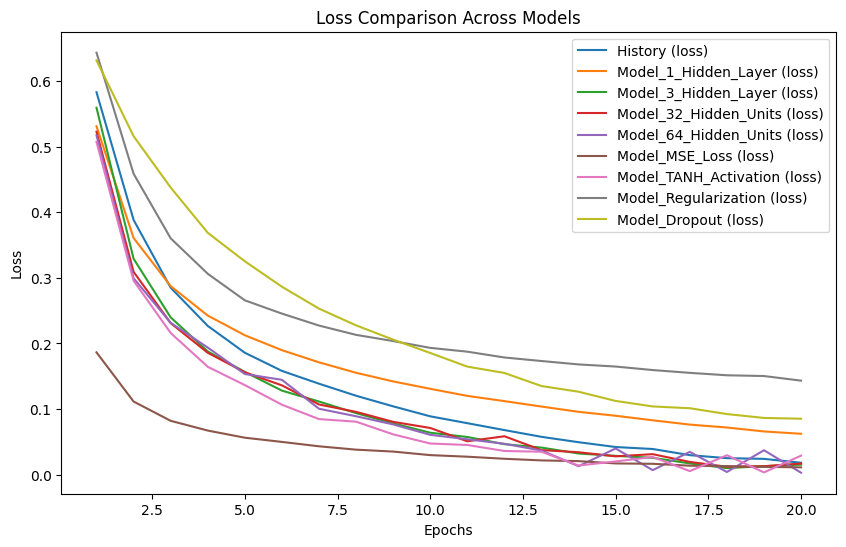

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "History": history,
    "Model_1_Hidden_Layer": Model_Hid_lay_1,
    "Model_3_Hidden_Layer": Model_3_Hid_Lay,
    "Model_32_Hidden_Units": Mod_32_Hid_Units,
    "Model_64_Hidden_Units": Mod_64_Hid_Units,
    "Model_MSE_Loss": Mod_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Mod_Reg_Tech,
    "Model_Dropout": Mod_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Model    | 0.28      | 0.88          |
| 1HL      | 0.28      | 0.88          |
| 3HL      | 0.33      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.27      | 0.89          |
| MSE      | 0.08      | 0.88          |
| Tanh     | 0.42      | 0.86          |
| Reg       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |